In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
dataSet = [[1,1,"yes"],[1,1,"yes"],[1,0,"no"],[0,1,"no"],[0,1,"no"]]


In [5]:
from math import log

def calcEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 1
        else:
            labelCounts[currentLabel] += 1
    ent = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key]) / numEntries
        ent -= prob * log(prob,2)
    return ent

In [6]:
#test
calcEnt(dataSet)

0.9709505944546686

In [7]:
## 根据axis属性的不同取值划分数据集
def splitDataSet(dataSet,axis,value):
    retDataSet = []
    for featVec in dataSet:
        if(featVec[axis] == value):
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis + 1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet


In [8]:
#test1
splitDataSet(dataSet,0,0)

[[1, 'no'], [1, 'no']]

In [9]:
#2
splitDataSet(dataSet,0,1)

[[1, 'yes'], [1, 'yes'], [0, 'no']]

In [10]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEnt = calcEnt(dataSet)
    bestFeature = -1
    maxInfoIncrese = 0.0
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        ent = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            ent += float(len(subDataSet))/ len(dataSet) * calcEnt(subDataSet)
        infoGain = baseEnt - ent
        if infoGain > maxInfoIncrese:
            maxInfoIncrese = infoGain
            bestFeature = i
    return bestFeature
    

In [11]:
chooseBestFeatureToSplit(dataSet)

0

In [12]:
def majorityCnt(classList):
    import operator
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys(): classCount[vote] = 0
        classCount[vote] += 1
    bestClass = -1
    maxCount = 0
    for key,val in classCount.items():
        if val > maxCount:
            maxCount = val
            bestClass = key
    return bestClass

In [13]:
#test1
majorityCnt([dataVec[-1] for dataVec in dataSet])

'no'

In [14]:
#2
majorityCnt([dataVec[-2] for dataVec in dataSet])

1

In [124]:
def createTree(dataSet,features):
    classList = [example[-1] for example in dataSet]
    
    #只剩下一种分类
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    
    #没有剩余特征用来划分数据集
    if len(dataSet[0]) == 1:
        return majorityCnt(dataSet)
    
    bestFeatIndex = chooseBestFeatureToSplit(dataSet)
    bestFeature = features[bestFeatIndex]
    myTree = {bestFeature : {}}
    del(features[bestFeatIndex])
    featValues = [example[bestFeatIndex] for example in dataSet]
    uniqueVals = set(featValues)
    
    for value in uniqueVals:
        subFeatures = features[:]
        myTree[bestFeature][value] = createTree(splitDataSet(dataSet,bestFeatIndex,value),subFeatures)
    return myTree




In [16]:
createTree(dataSet,["one","two"])

{'one': {0: 'no', 1: {'two': {0: 'no', 1: 'yes'}}}}

In [ ]:
def chooseBestFeatureToSplitWithContinousValues(dataSet):
    

def createTreeWithContinousValues(dataSet,features):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
         return classList[0]
    bestFeatIndex = chooseBestFeatureToSplitWithContinousValues(dataSet)
    bestFeature = features[bestFeatIndex]
    myTree = {bestFeature : {}}
    

In [17]:
import matplotlib.pyplot as plt
decisionNode = dict(boxstyle="sawtooth",fc="0.8")
leafNode = dict(boxstyle="round4",fc="0.8")
arrow_args = dict(arrowstyle="<-")


def plotNode(nodeTxt,conterPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords="axes fraction",
    xytext=conterPt,textcoords="axes fraction",
    va="center",ha="center",bbox=nodeType,arrowprops=arrow_args)
    
    
def createPlot():
    fig = plt.figure(1,facecolor="white")
    fig.clf()
    createPlot.ax1 = plt.subplot(111,frameon=False)
    plotNode("a decision node",(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode("a leaf node",(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

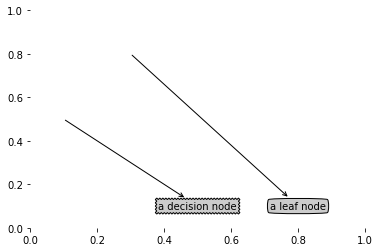

In [18]:
createPlot()

In [19]:
def getNumsOfLeaf(myTree):
    NumsOfLeaf = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]) == type({}):
            NumsOfLeaf += getNumsOfLeaf(secondDict[key])
        else :
            NumsOfLeaf += 1
    return NumsOfLeaf

def getLevelsOfTree(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    thisDepth = 0
    for key in secondDict.keys():
        if type(secondDict[key]) == type({}):
            thisDepth += getLevelsOfTree(secondDict[key])
        else:
            thisDepth = 1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth

In [20]:

getNumsOfLeaf(createTree(dataSet,["one","two"]))

3

In [21]:
getLevelsOfTree(createTree(dataSet,["one","two"]))

2

In [22]:
def retrieveTree(i):
    listOfTrees = [{"no surfacing":{0:"no",1:{"flippers":{0:"no",1:"yes"}}}},
                   {"no surfacing":{0:"no",1:{"flippers":{0:{"head":{0:"no",1:"yes"}}}}}}]
    return listOfTrees[i]

In [23]:
def plotMidText(cntrPt,parentPt,textString):
    xMid = (parentPt[0] - cntrPt[0]) / 2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1]) / 2.0 + cntrPt[1]
    createPlot.ax1.text(xMid,yMid,textString)
    
def plotTree(myTree,parentPt,nodeTxt):
    numLeafs = getNumsOfLeaf(myTree)
    depth = getLevelsOfTree(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1.0  + float(numLeafs))/ 2.0/plotTree.totalW,plotTree.yOff)
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff -= 1.0 / plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]) == type({}):
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff += 1.0 / plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff += 1.0 / plotTree.totalD


def createPlot(inTree):
    fig = plt.figure(1,facecolor="white")
    fig.clf()
    axprops = dict(xticks=[],yticks=[])
    createPlot.ax1 = plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW = float(getNumsOfLeaf(inTree))
    plotTree.totalD = float(getLevelsOfTree(inTree))
    plotTree.xOff = -0.5 / plotTree.totalW;plotTree.yOff = 1.0;
    plotTree(inTree,(0.5,1.0),"")
    plt.show()

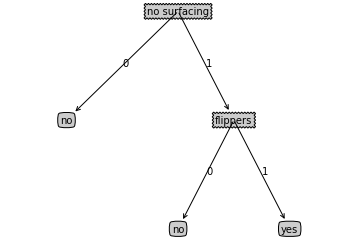

In [24]:
createPlot(retrieveTree(0))

In [27]:
inputTree = retrieveTree(0)

In [35]:
def classify(inputTree,featLabels,testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]) == type({}):
                return classify(secondDict[testVec[featIndex]],featLabels,testVec)
            else :
                return secondDict[key]
    
    
    

In [33]:
inputTree

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

In [37]:
classify(inputTree,["no surfacing","flippers"],[1,2])

In [84]:
def getDTCorrectRate(inputTree,testData):
    numSamples = len(testData)
    numIncorrect = 0.0
    features = [i for i in range(len(testData[0]) - 1)]
    for sample in testData:
        if(classify(inputTree,features,sample[:-1]) != sample[-1]):
            numIncorrect += 1
    return (1 - numIncorrect / numSamples)

In [49]:
def storeTree(inputTree,filename):
    import pickle
    fw = open(filename,'wb+')
    pickle.dump(inputTree,fw)
    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename,"rb+")
    return pickle.load(fr)

In [50]:
storeTree(inputTree,str("classfierStorge.txt"))

In [51]:
grabTree("classfierStorge.txt")

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}

# Practice in DT

In [52]:
lenses = pd.read_csv("lenses.txt",delimiter='\t',header=None)

In [54]:
featureLabel = ["age","prescript","astigmatic","tearRate"]

In [71]:
lenses = [[i for i in item] for item in np.array(lenses)]
lensesTree = createTree(lenses,featureLabel)

In [72]:
lensesTree

{'tearRate': {'normal': {'astigmatic': {'no': {'age': {'pre': 'soft',
      'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}},
      'young': 'soft'}},
    'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses',
        'presbyopic': 'no lenses',
        'young': 'hard'}},
      'myope': 'hard'}}}},
  'reduced': 'no lenses'}}

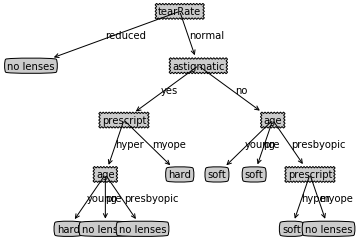

In [74]:
createPlot(lensesTree)

In [135]:
def kFoldCrossValidation(data,k):
    np.random.seed(int(time.time()))
    np.random.shuffle(data)
    inc = int(len(data)/ k)
    kData =[data[inc * i:(i + 1) * inc] for i in range(k)]
    correctRate = 0.0
    features = [0,1,2,3]
    for i in range(k):
        testData = kData[i]
        trainData = []
        for index in range(k):
            if(index != i):
                trainData.extend(kData[index])
        
        correctRate += getDTCorrectRate(createTree(trainData,features[:]),testData)
    return correctRate / k

In [165]:
data = np.array(pd.read_csv("iris.data",header=None))
data = [[i for i in item] for item in data]
kFoldCrossValidation(data,150)

0.76